In [1]:
# Libraries required for EDA

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Libraries required for model selection

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Libraries required for the model

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.neural_network import MLPClassifier

# Removing warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("walkrun.csv")
data.head(5)

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [3]:
data.shape

(88588, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [5]:
data.describe

<bound method NDFrame.describe of             date                time username  wrist  activity  \
0      2017-6-30  13:51:15:847724020   viktor      0         0   
1      2017-6-30  13:51:16:246945023   viktor      0         0   
2      2017-6-30  13:51:16:446233987   viktor      0         0   
3      2017-6-30  13:51:16:646117985   viktor      0         0   
4      2017-6-30  13:51:16:846738994   viktor      0         0   
...          ...                 ...      ...    ...       ...   
88583   2017-7-9   20:9:15:317911028   viktor      0         0   
88584   2017-7-9   20:9:15:517889022   viktor      0         0   
88585   2017-7-9   20:9:15:717828989   viktor      0         0   
88586   2017-7-9   20:9:15:917932987   viktor      0         0   
88587   2017-7-9   20:9:16:117410004   viktor      0         0   

       acceleration_x  acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  
0              0.2650         -0.7814         -0.0076 -0.0590  0.0325 -2.9296  
1            

### Checking for missing values

In [6]:
data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

### There are no missing values.

### Checking for duplicates

In [7]:
data.duplicated().sum()

0

### There are no duplicates.

### Checking the statistical details

In [8]:
data.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [9]:
# Function to find the outliers

def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)

In [10]:
# Number of outliers in data from accelerometer

print("Number of outliers in acceleration_x:", len(findoutliers(data.acceleration_x)))
print("Number of outliers in acceleration_y:", len(findoutliers(data.acceleration_y)))
print("Number of outliers in acceleration_z:", len(findoutliers(data.acceleration_z)))

Number of outliers in acceleration_x: 11594
Number of outliers in acceleration_y: 1588
Number of outliers in acceleration_z: 12637


In [11]:
# Number of outliers in data from gyroscope

print("Number of outliers in gyro_x:", len(findoutliers(data.gyro_x)))
print("Number of outliers in gyro_y:", len(findoutliers(data.gyro_y)))
print("Number of outliers in gyro_z:", len(findoutliers(data.gyro_z)))

Number of outliers in gyro_x: 225
Number of outliers in gyro_y: 3004
Number of outliers in gyro_z: 134


### Visualising the outliers

<AxesSubplot:>

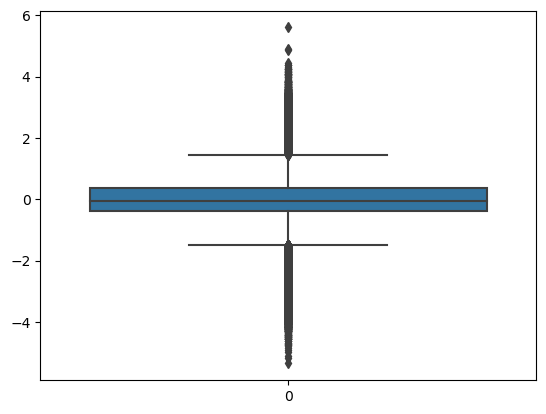

In [12]:
# acceleration_x

sns.boxplot(data.acceleration_x)

### The values less than -1.5 and greater than 1.5 are considered to be outliers.

<AxesSubplot:>

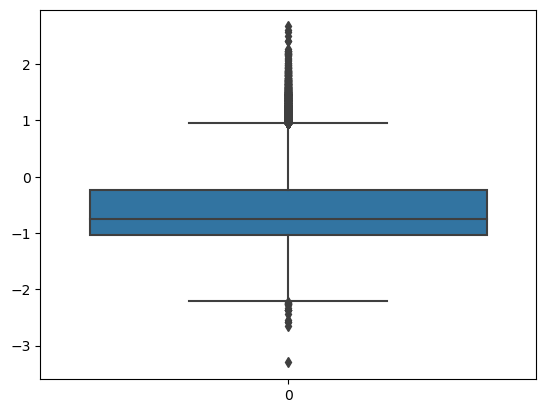

In [13]:
# acceleration_y

sns.boxplot(data.acceleration_y)

### The values less than -2.25 and greater than 1 are considered to be outliers.

<AxesSubplot:>

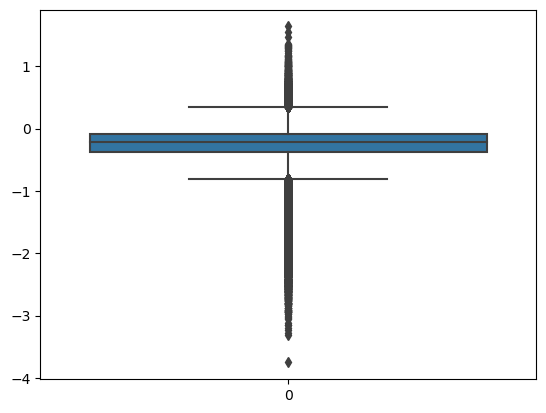

In [14]:
# acceleration_z

sns.boxplot(data.acceleration_z)


### The values less than -0.75 and greater than 0.25 are considered to be outliers.

<AxesSubplot:>

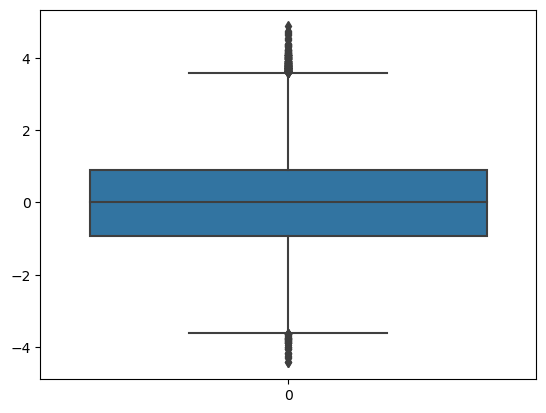

In [15]:
# gyro_x

sns.boxplot(data.gyro_x)

### The values less than -3.75 and greater than 3.75 are considered to be outliers.

<AxesSubplot:>

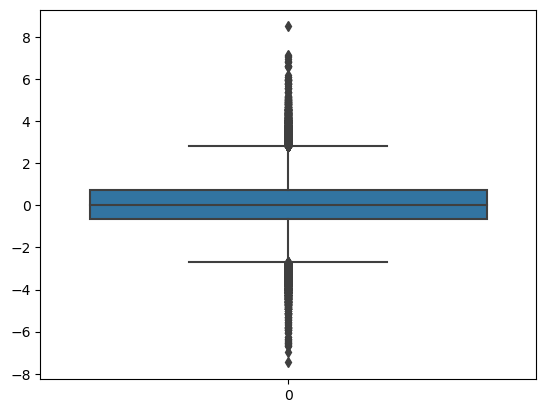

In [16]:
# gyro_y

sns.boxplot(data.gyro_y)

### The values less than -2.5 and greater than 2.5 are considered to be outliers.

<AxesSubplot:>

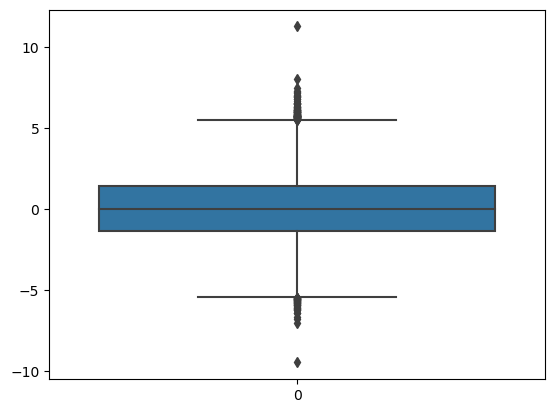

In [17]:
# gyro_z

sns.boxplot(data.gyro_z)

### The values less than 5 and greater than 5 are considered to be outliers.

### Exploratory Data Analysis

### Visualising the target

In [18]:
data['activity'].value_counts()

1    44365
0    44223
Name: activity, dtype: int64

<AxesSubplot:xlabel='activity', ylabel='count'>

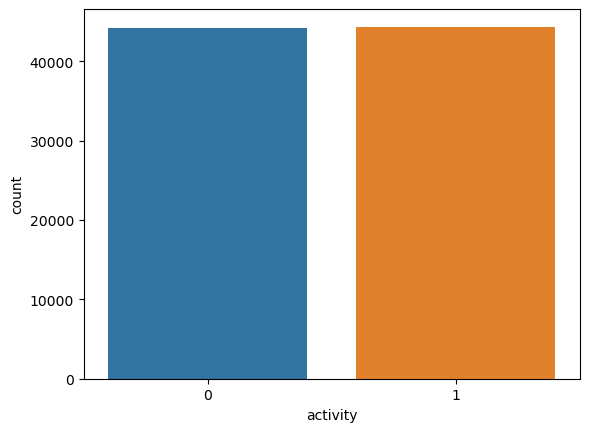

In [19]:
sns.countplot(x = data['activity'])

### There is no imbalanced data as there is equal number of walk and run activity.

### Visualising the categorical input

In [20]:
data['wrist'].value_counts()

1    46258
0    42330
Name: wrist, dtype: int64

<AxesSubplot:xlabel='wrist', ylabel='count'>

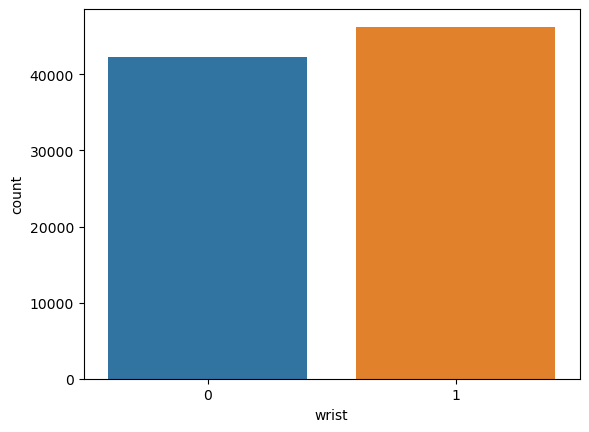

In [21]:
sns.countplot(x = data['wrist'])

### The number of left handed and right handed individuals are almost equal.

### Visualising the numerical input

<AxesSubplot:xlabel='acceleration_x', ylabel='Density'>

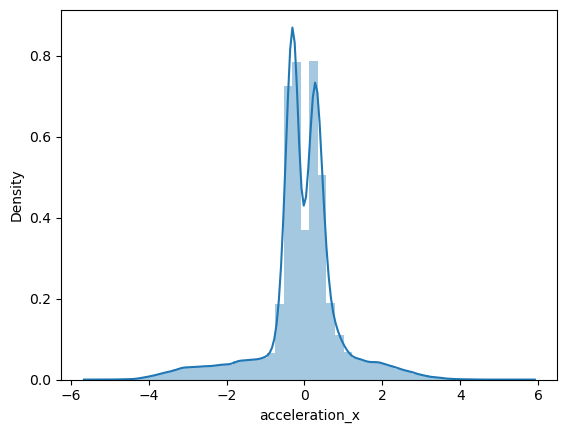

In [22]:
# acceleration_x

sns.distplot(data.acceleration_x)

<AxesSubplot:xlabel='acceleration_y', ylabel='Density'>

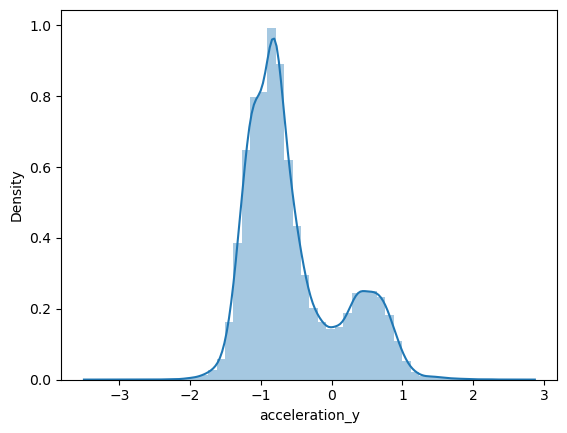

In [23]:
# acceleration_y

sns.distplot(data.acceleration_y)

<AxesSubplot:xlabel='acceleration_z', ylabel='Density'>

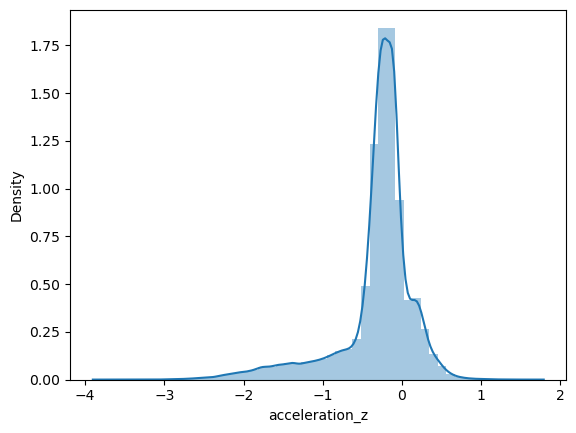

In [24]:
# acceleration_z

sns.distplot(data.acceleration_z)

<AxesSubplot:xlabel='acceleration_z', ylabel='Density'>

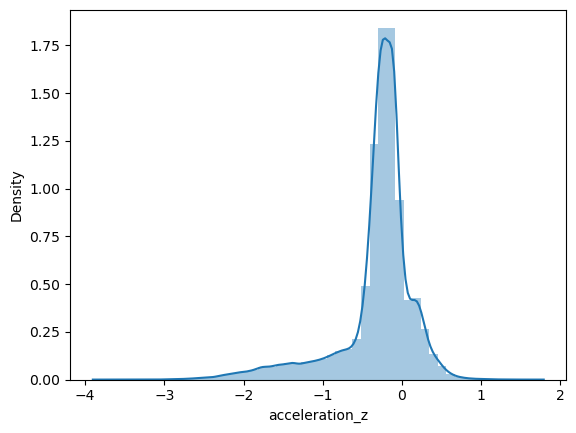

In [25]:
# acceleration_z

sns.distplot(data.acceleration_z)


<AxesSubplot:xlabel='gyro_y', ylabel='Density'>

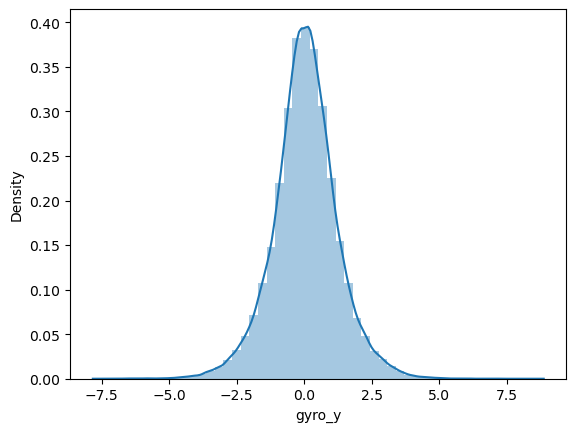

In [26]:
# gyro_y

sns.distplot(data.gyro_y)

<AxesSubplot:xlabel='gyro_z', ylabel='Density'>

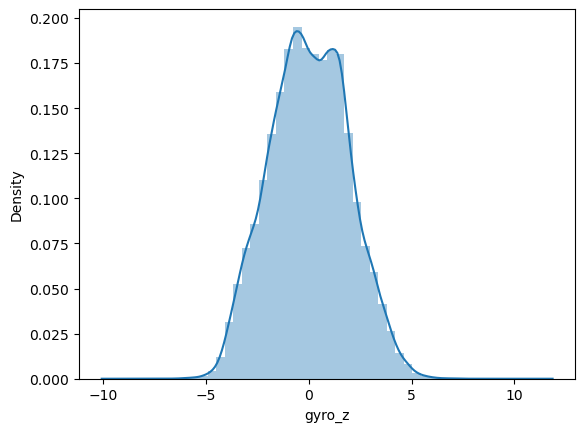

In [27]:
# gyro_z

sns.distplot(data.gyro_z)


### Checking the correlation

<AxesSubplot:>

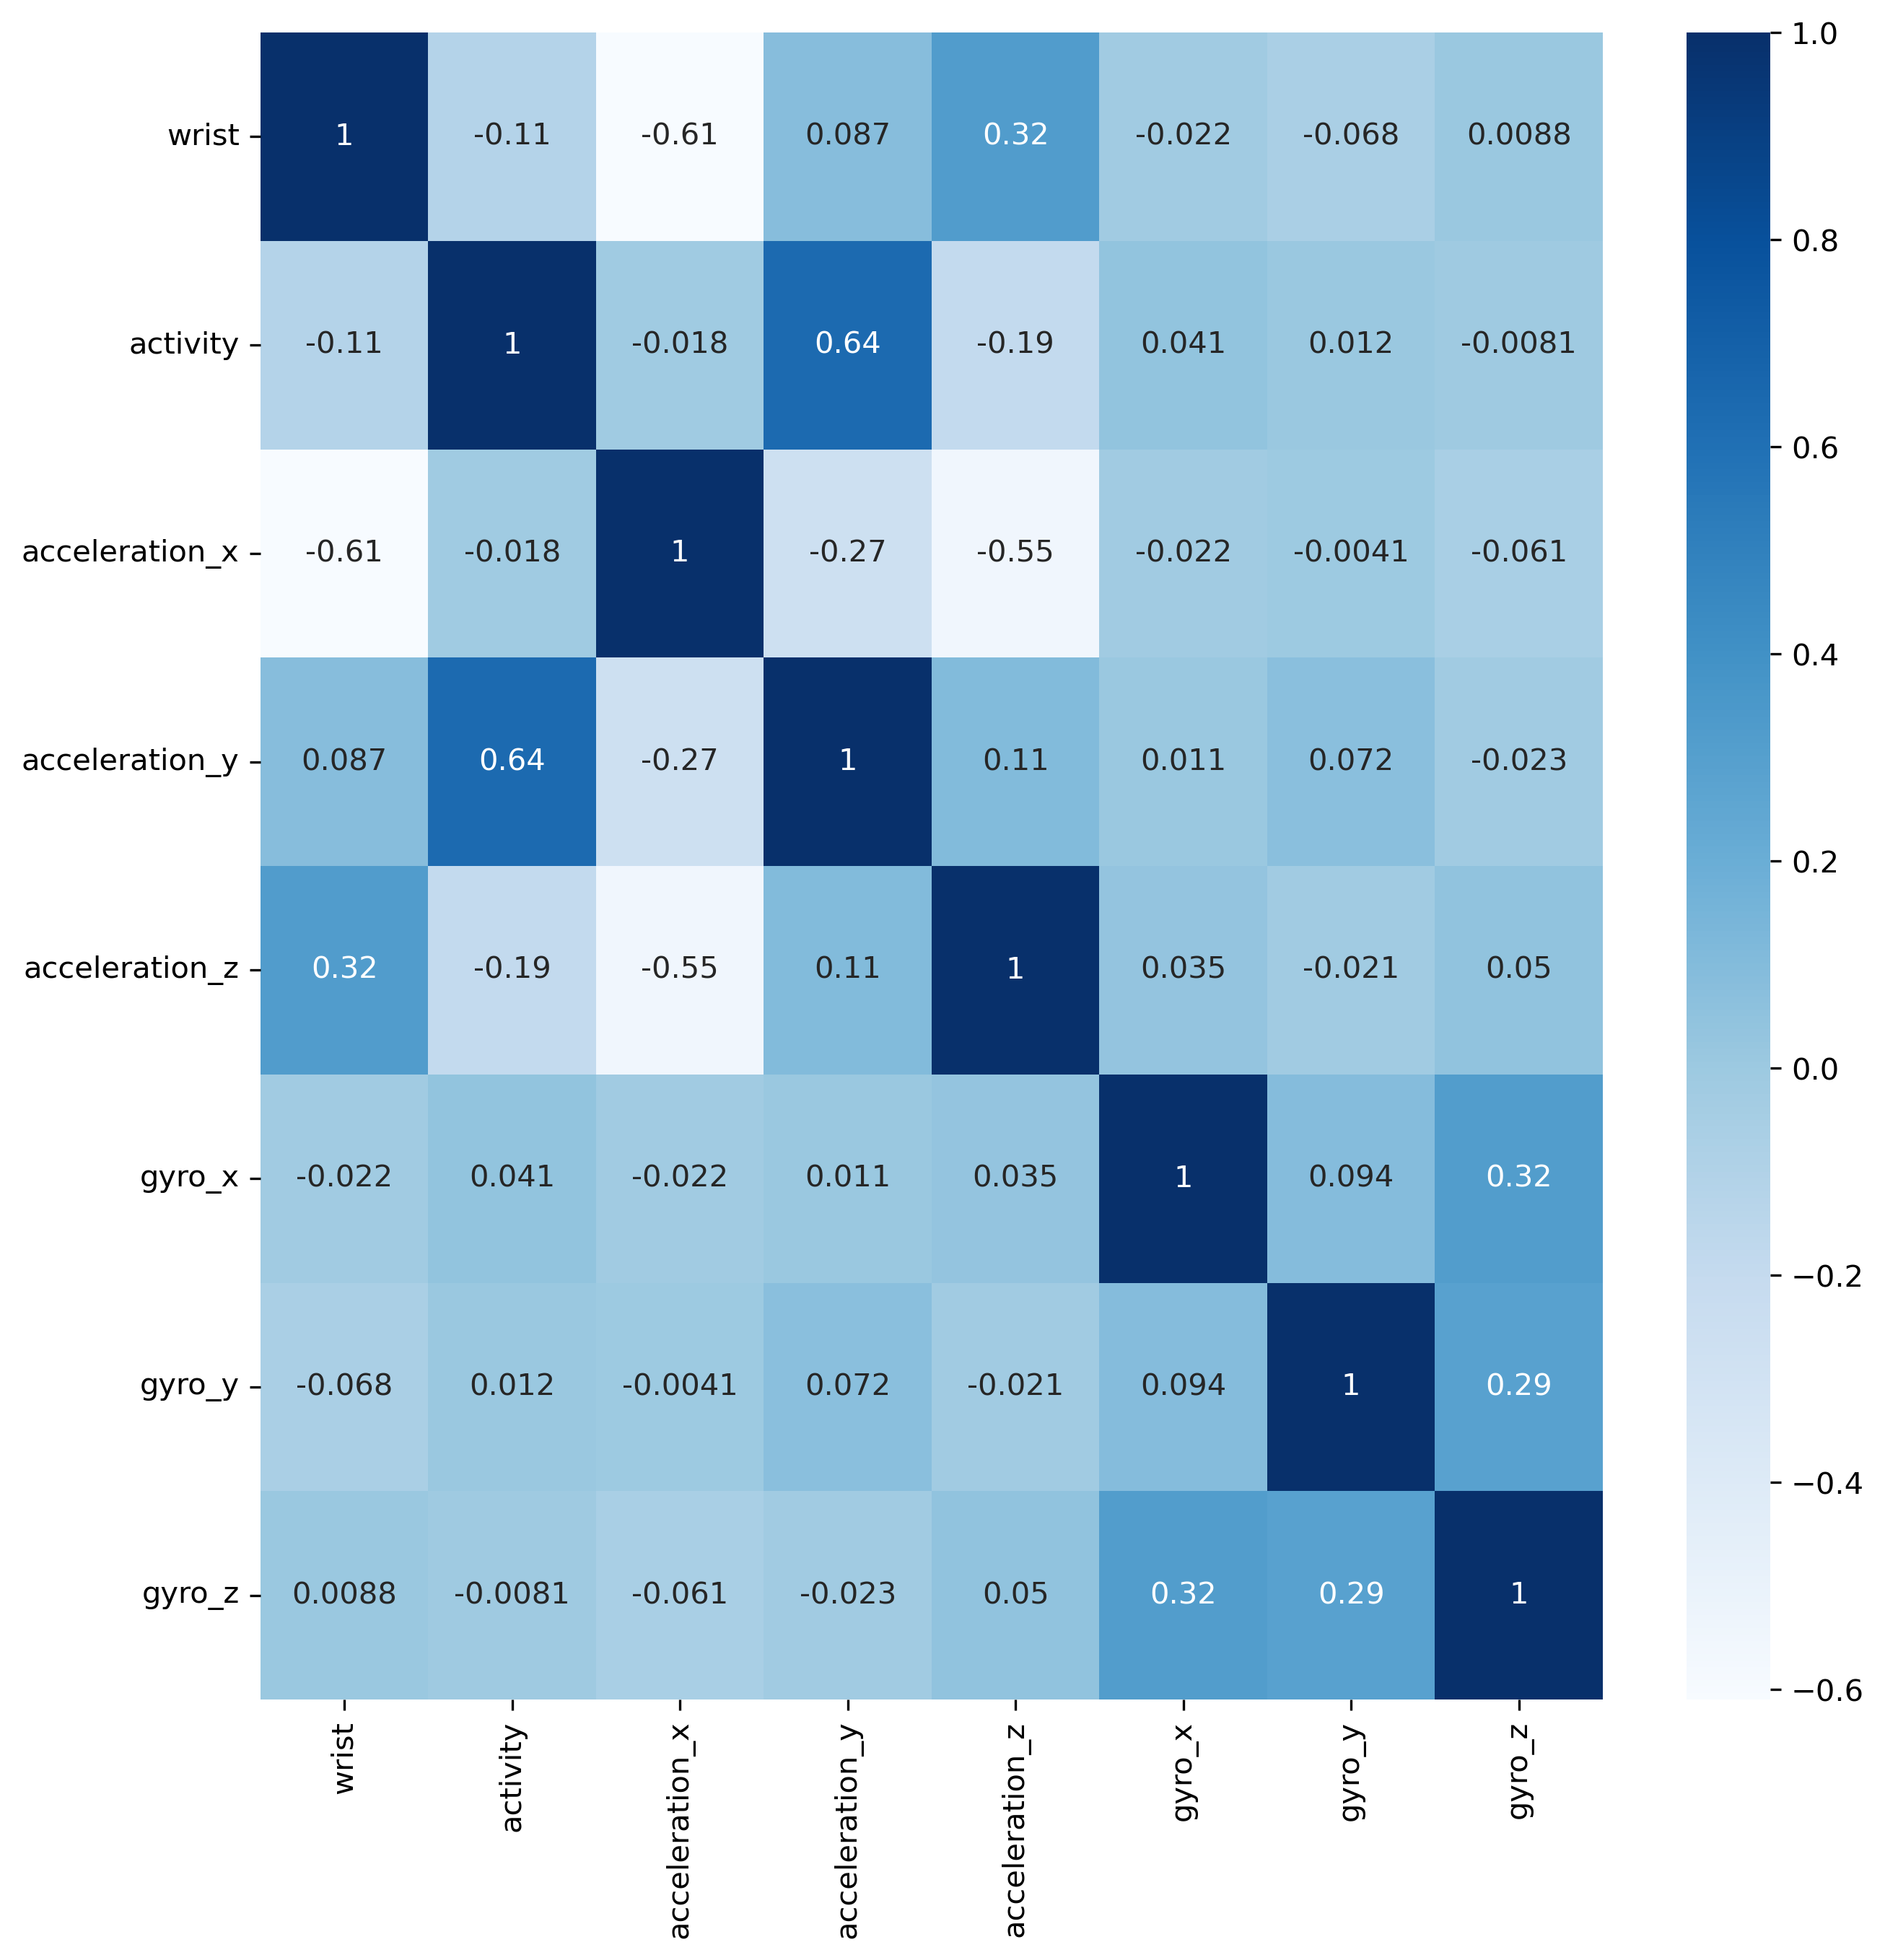

In [28]:
# Getting the correlations of each features in dataset

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10), dpi = 300)

# Plot Heatmap

sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="Blues")

### Only acceleration_x seems to have high correlation with wrist (-0.61).

### MODEL


### Defining independent and dependent variables

In [29]:

# Independent variable

X = data.iloc[:,[3,5,6,7,8,9,10]]

# Dependent variable

y = data.activity

In [30]:
# Checking the independent variable

X

,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...
88583,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [31]:
# Checking the dependent variable

y

0        0
1        0
2        0
3        0
4        0
        ..
88583    0
88584    0
88585    0
88586    0
88587    0
Name: activity, Length: 88588, dtype: int64

### Splitting into training and testing data

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 23)

### Recurrent Neural Network

In [33]:
# Creating the model

def create_baseline():
    model = keras.Sequential(
    [
        layers.Dense(14, input_shape = (None,7), activation="relu"), ##?
        layers.Dense(20, activation="relu"),
        layers.Dense(10, activation="relu"),
        layers.Dense(5, activation="relu"),
        layers.Dense(1,  activation="sigmoid"),
    ]
    )
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [34]:
# Initializing the model

model_RNN = create_baseline()

In [35]:
# Checking the model summary

model_RNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 14)          112       
                                                                 
 dense_1 (Dense)             (None, None, 20)          300       
                                                                 
 dense_2 (Dense)             (None, None, 10)          210       
                                                                 
 dense_3 (Dense)             (None, None, 5)           55        
                                                                 
 dense_4 (Dense)             (None, None, 1)           6         
                                                                 
Total params: 683
Trainable params: 683
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Training the model

model_RNN.fit(x_train, y_train, batch_size=128, epochs=15)

Epoch 1/15
485/485 [==============================] - 1s 1ms/step - loss: 0.2527 - accuracy: 0.8939
Epoch 2/15
485/485 [==============================] - 1s 1ms/step - loss: 0.0499 - accuracy: 0.9843
Epoch 3/15
485/485 [==============================] - 1s 1ms/step - loss: 0.0398 - accuracy: 0.9874
Epoch 4/15
485/485 [==============================] - 1s 1ms/step - loss: 0.0337 - accuracy: 0.9891
Epoch 5/15
485/485 [==============================] - 1s 1ms/step - loss: 0.0309 - accuracy: 0.9898
Epoch 6/15
485/485 [==============================] - 1s 1ms/step - loss: 0.0291 - accuracy: 0.9904
Epoch 7/15
485/485 [==============================] - 1s 1ms/step - loss: 0.0275 - accuracy: 0.9910
Epoch 8/15
485/485 [==============================] - 1s 1ms/step - loss: 0.0275 - accuracy: 0.9911
Epoch 9/15
485/485 [==============================] - 1s 2ms/step - loss: 0.0268 - accuracy: 0.9912
Epoch 10/15
485/485 [==============================] - 1s 1ms/step - loss: 0.0265 - accuracy: 0.9915

### Accuracy with RNN is 99.3%

### Artificial Neural Network

In [37]:
# Initializing 

model = MLPClassifier()

# Training

model.fit(x_train,y_train)

# Predicting

y_predict=model.predict(x_test)

# Testing

accuracy_score(y_test,y_predict)

0.9924746961658577

### Accuracy with ANN is 99.3%

### RNN gives better scores compared to ANN